In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

In [2]:
passengers = pd.read_csv('ausair.csv', index_col='Year', parse_dates=True)

# Задание №1

1. Определите функцию, которая принимает на вход временной ряд и параметры модели Хольта для линейного тренда (см. задание 2 с предыдущего занятия). Данная функция должна возвращать среднеквадратичную ошибку модели.
2. Определите оптимальные параметры  𝛼  и  𝛽  для ряда объемов пассажирских авиаперевозок в Австралии (файл ausair.csv). Постройте модель Хольта с найденными параметрами и получите прогноз на 10 лет вперед.

In [3]:
def Lineal(passengers,a,b):
    date_start=passengers.index[-1]+pd.DateOffset(years=1) #формируем столбец новых дат с 2017-2026
    date_end=date_start+pd.DateOffset(years=9)
    dates=pd.date_range(date_start,date_end,freq='YS')
    new_dates=pd.DataFrame(dates)
    new_dates.columns=['date']
    new_dates=new_dates.set_index('date')

    nn = np.empty(10) # строки с 2017-2026 заполним nan
    nn.fill(np.nan)
    new_df = pd.concat([passengers, new_dates]) #объединяем в единый DataFrame

    y=passengers['Passengers'].values
    len_y=len(y)
    l=[]
    tr=[]
    tr.append(b*(y[1]-y[0]))
    l.append(y[0])

    for i in range(1,len_y): #находим уровень l и тренд для 1970-2015
        l.append(a*y[i]+(1-a)*(l[-1]+tr[-1]))
        tr.append(b*(l[-1]-l[-2])+(1-b)*tr[-1])

    for i in range(10):#находим данные для 2017-2026
        y=np.append(y,l[-1]+tr[-1])
        l.append(a*y[-1]+(1-a)*(l[-1]+tr[-1]))
        tr.append(b*(l[-1]-l[-2])+(1-b)*tr[-1])    
    
    new_df['lin']=l
    return new_df

In [4]:
def fun(a,b):
    return np.sum((Lineal(passengers,a,b)['Passengers'].values[1:-10]-Lineal(passengers,a,b)['lin'].values[1:-10])**2)/passengers.size

In [5]:
# 0<=a<=1, 0<=b<=1
bnds = ((0,0.8),(0,0.7))
result=minimize(lambda x: fun(x[0], x[1]), (0,0), bounds=bnds)
a_b=result.x

In [6]:
result

      fun: 0.16033491497784153
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.61946394e+00, -5.37070388e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 48
      nit: 5
     njev: 16
   status: 0
  success: True
        x: array([0.8      , 0.1376077])

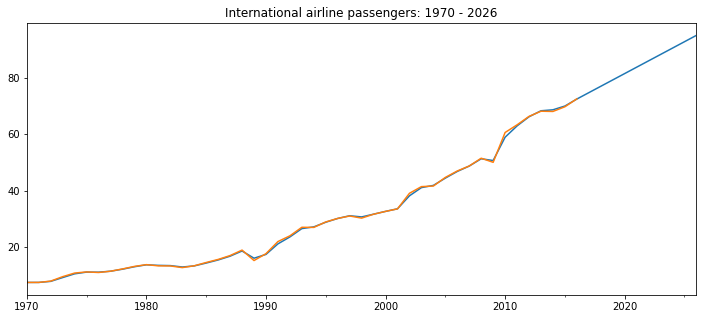

In [7]:
Lineal(passengers,a_b[0],a_b[1])['lin'].plot(figsize=(12,5)) #отрисовываем
Lineal(passengers,a_b[0],a_b[1])['Passengers'].plot(figsize=(12,5)) 
plt.title('International airline passengers: 1970 - 2026')
plt.show()

# Задание №2

1. Для модели Хольта с аддитивным затухающим трендом (задание 3 с предыдущего занятия) проделайте те же шаги, что и в задании 1. В данном случае кроме параметров  𝛼  и  𝛽  необходимо также определить оптимальный параметр  𝜙 .
2. Сравните на графике аппроксимации и прогнозы с помощью модели для линейного тренда и модели с аддитивным затухающим трендом.

In [8]:
def zatux(passengers,a,b,fi):
    date_start=passengers.index[-1]+pd.DateOffset(years=1) #формируем столбец новых дат с 2017-2027
    date_end=date_start+pd.DateOffset(years=9)
    dates=pd.date_range(date_start,date_end,freq='YS')
    new_dates=pd.DataFrame(dates)
    new_dates.columns=['date']
    new_dates=new_dates.set_index('date')

    nn = np.empty(10) # строки с 2017-2026 заполним nan
    nn.fill(np.nan)
    new_df = pd.concat([passengers, new_dates]) #объединяем в единый DataFrame
    y2=passengers['Passengers'].values
    len_y2=len(y2)
    l2=[]
    tr2=[]
    tr2.append(y2[1]-y2[0])
    l2.append(y2[0])

    for i in range(1,len_y2):#находим уровень l и тренд для 1970-2016       
        l2.append(a*y2[i]+(1-a)*(l2[-1]+fi*tr2[-1]))
        tr2.append(b*(l2[-1]-l2[-2])+(1-b)*fi*tr2[-1])
    ff=fi    
    for i in range(10):#находим данные для 2017-2026
        y2=np.append(y2,l2[-1]+fi*tr2[-1])
        l2.append(a*y2[-1]+(1-a)*(l2[-1]+fi*tr2[-1]))
        tr2.append(b*(l2[-1]-l2[-2])+(1-b)*fi*tr2[-1])

    new_df['lin2']=l2
    return new_df

In [9]:
def fun2(a,b,fi):
    return np.sum((zatux(passengers,a,b,fi)['Passengers'].values[:-11]-zatux(passengers,a,b,fi)['lin2'].values[:-11])**2)/passengers.size

In [10]:
# 0<=a<=1, 0<=b<=1, 0<=fi<=1
bnds2 = ((0,0.9),(0,0.9),(0,0.9))
result2=minimize(lambda x: fun2(x[0],x[1],x[2]), (0,0,0), bounds=bnds2)
a_b_fi=result2.x

In [11]:
result2

      fun: 0.04335547481595563
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-8.61876767e-01,  1.65978342e-06, -2.51987346e-02])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 92
      nit: 11
     njev: 23
   status: 0
  success: True
        x: array([0.9       , 0.24715336, 0.9       ])

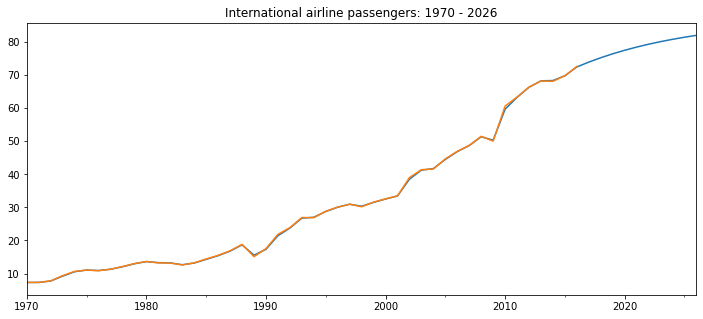

In [12]:
zatux(passengers,a_b_fi[0],a_b_fi[1],a_b_fi[2])['lin2'].plot(figsize=(12,5)) #отрисовываем
zatux(passengers,a_b_fi[0],a_b_fi[1],a_b_fi[2])['Passengers'].plot(figsize=(12,5)) 
plt.title('International airline passengers: 1970 - 2026')
plt.show()

Сравним:

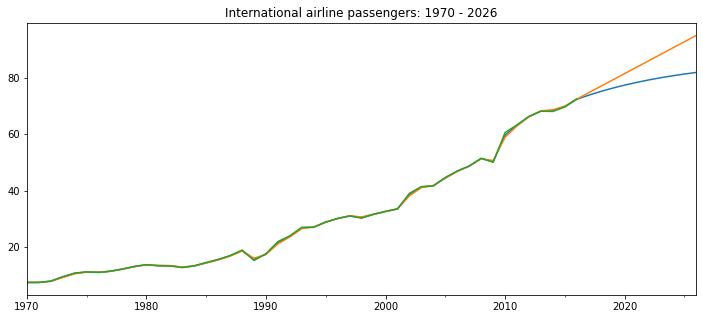

In [13]:
zatux(passengers,a_b_fi[0],a_b_fi[1],a_b_fi[2])['lin2'].plot(figsize=(12,5)) #отрисовываем
Lineal(passengers,a_b[0],a_b[1])['lin'].plot(figsize=(12,5))
zatux(passengers,a_b_fi[0],a_b_fi[1],a_b_fi[2])['Passengers'].plot(figsize=(12,5)) 
plt.title('International airline passengers: 1970 - 2026')
plt.show()